In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# Importing dependencies

In [2]:
from PIL import Image
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator #pipeline for image
from tensorflow.keras import layers,models

# Data Preprocessing


In [3]:
base_dir = '/Users/suhas/Downloads/plantvillage dataset/color'

(256, 256, 3)


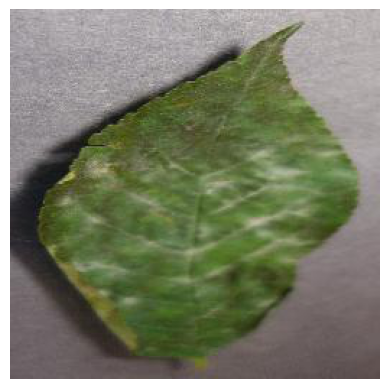

In [4]:
image_path = '/Users/suhas/Downloads/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/0a283423-3a6d-43a4-92e5-267c8153ca45___FREC_Pwd.M 4921.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# required image parameter
img_size = 224
batch_size = 32

In [6]:
# image data generation

data_gen = ImageDataGenerator(
    rescale= 1./255,   # rescalling images 
    validation_split = 0.3
    
)

In [7]:
# Train generator 

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    subset='training',
    class_mode = 'categorical'

)

Found 38029 images belonging to 38 classes.


In [8]:
# validation generator 
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    subset='validation',
    class_mode = 'categorical'
    
)


Found 16276 images belonging to 38 classes.


# VGG

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

2024-05-18 00:12:27.142796: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-18 00:12:27.142821: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-18 00:12:27.142829: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-18 00:12:27.142860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-18 00:12:27.142876: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Model training

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/20


2024-05-18 00:12:35.472514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1188/1188 [==============================] - 395s 330ms/step - loss: 1.1272 - accuracy: 0.6993 - val_loss: 0.5471 - val_accuracy: 0.8455
Epoch 2/20
1188/1188 [==============================] - 391s 329ms/step - loss: 0.4489 - accuracy: 0.8637 - val_loss: 0.3796 - val_accuracy: 0.8800
Epoch 3/20
1188/1188 [==============================] - 390s 329ms/step - loss: 0.3411 - accuracy: 0.8934 - val_loss: 0.3345 - val_accuracy: 0.8877
Epoch 4/20
1188/1188 [==============================] - 391s 329ms/step - loss: 0.2857 - accuracy: 0.9087 - val_loss: 0.2998 - val_accuracy: 0.9023
Epoch 5/20
1188/1188 [==============================] - 390s 329ms/step - loss: 0.2542 - accuracy: 0.9169 - val_loss: 0.2673 - val_accuracy: 0.9112
Epoch 6/20
1188/1188 [==============================] - 391s 329ms/step - loss: 0.2301 - accuracy: 0.9253 - val_loss: 0.2388 - val_accuracy: 0.9224
Epoch 7/20
1188/1188 [==============================] - 391s 329ms/step - loss: 0.2131 - accuracy: 0.9303 - val_loss: 0.230

# Model Evalution

In [13]:
val_loss,val_accuracy = model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

508/508 [==============================] - 95s 187ms/step - loss: 0.2008 - accuracy: 0.9355
Validation Accuracy: 93.55%


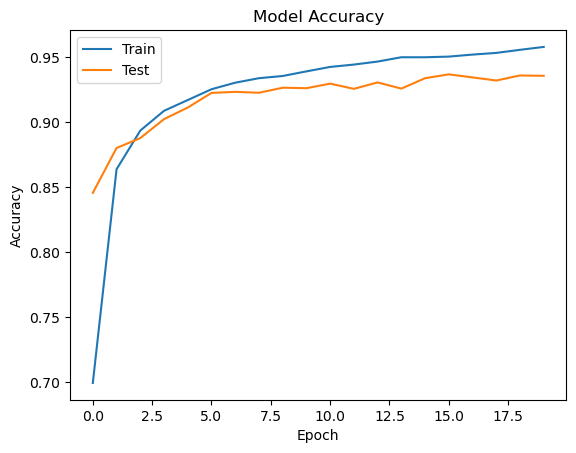

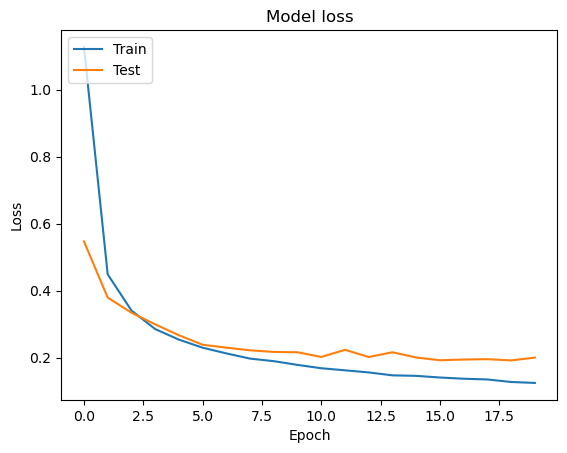

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


# Building Predictive System

In [15]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [16]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [17]:
json.dump(class_indices, open('class_indices_vgg.json', 'w'))

In [18]:
image_path = '/Users/suhas/Downloads/plantvillage dataset/color/Apple___Apple_scab/0cbfa4fa-63d8-43ce-9385-ff140e524b69___FREC_Scab 3164.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 1s 1s/step
Predicted Class Name: Apple___Apple_scab


In [19]:
model.save('plant_disease_prediction_VGG_model.h5')


/Users/suhas/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('VGG.h5')

# Get the true labels from the validation generator
y_true = validation_generator.classes

# Make predictions on the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

2024-05-18 11:20:57.551319: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-18 11:20:57.551345: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-18 11:20:57.551353: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-18 11:20:57.551382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-18 11:20:57.551399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-18 11:20:58.549509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


509/509 [==============================] - 96s 186ms/step
Accuracy: 0.0439
Precision: 0.0439
Recall: 0.0439
F1-score: 0.0438
